# KMeans Clustering
# Dataset : Mall_customers
# By : M. Fadli Rahmat

In [32]:
# Import modul-modul yang dibutuhkan
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
# Membuat Dataframe dari file dataset csv
df = pd.read_csv("https://raw.githubusercontent.com/mfadlirahmat/Fadli-s-Dataset/main/Mall_Customers.csv")

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# drop columns yang tidak dibutuhkan
x = df.drop(['CustomerID',	'Gender'], axis=1)

In [36]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [37]:
# Menghitung nilai wcss/inertia_ untuk jumlah cluster 1-11
cluster = []
for i in range (1,11):
  km = KMeans(n_clusters=i).fit(x)
  cluster.append(km.inertia_)

In [38]:
cluster

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51084.50595493436,
 44307.87341670445,
 40929.76488635381,
 37248.45914067414]

Text(0, 0.5, 'Inertia')

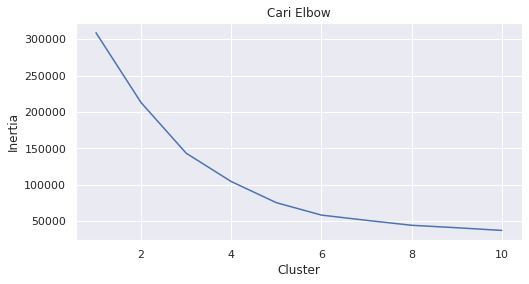

In [39]:
# Plotting wcss/ inertia_ untuk melihat elbow method
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

In [40]:
# Melakukan Clustering dengan 5 Cluster (sesuai elbow method)
km5 = KMeans(n_clusters=5).fit(x)

In [43]:
# Menambahkan column label pada dataframe
x['Labels'] = km5.labels_

In [44]:
x

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'KMeans dengan 5 Cluster')

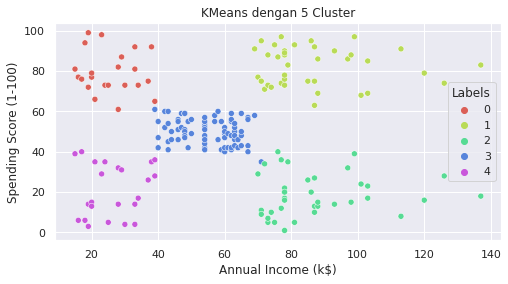

In [45]:
# Melakukan plotting dataset sesuai cluster yang dibuat
plt.figure(figsize=(8,4))
sns.scatterplot(x['Annual Income (k$)'],	x['Spending Score (1-100)'], hue=x['Labels'],
                  palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 Cluster')